In [16]:
import matplotlib as py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2


In [4]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
data = datagen.flow_from_directory(
    'images',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)


Found 71774 images belonging to 3 classes.


In [30]:
picture_size = 40


In [32]:
import os
print(os.path.abspath("images"))


D:\project on gb\Facial Emotion Recognition\images


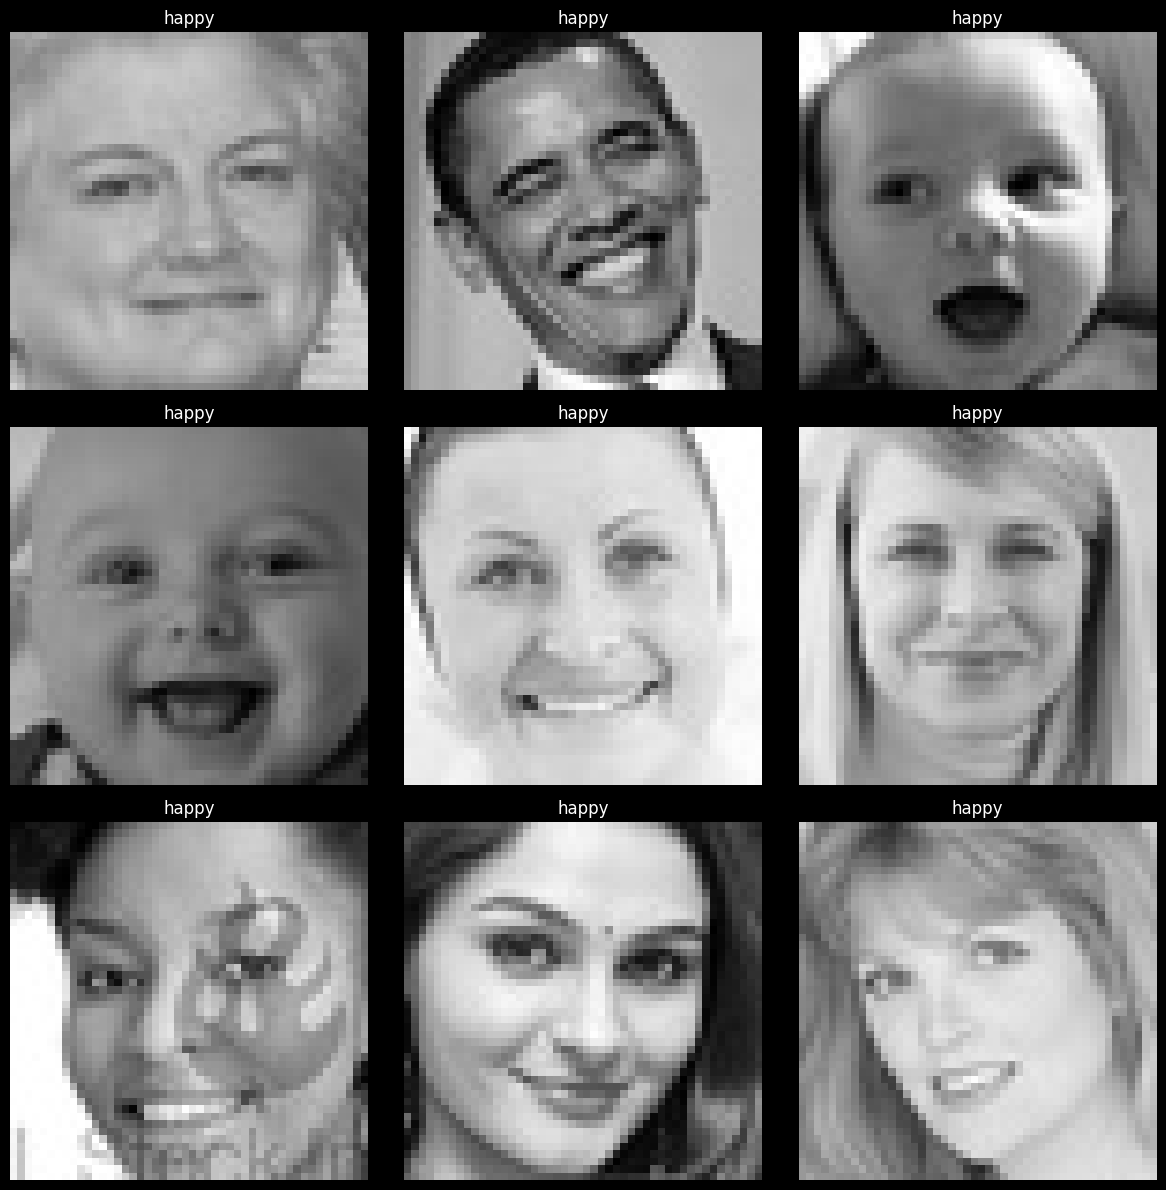

In [53]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator

# Constants
picture_size = 48
expression = 'happy'
folder_path = "images/train/" 

# Check if the directory exists
expression_folder = os.path.join(folder_path, expression)
if not os.path.isdir(expression_folder):
    print(f"Error: Directory '{expression_folder}' does not exist.")
else:
    # Plotting first 9 images from the specified expression folder
    plt.figure(figsize=(12, 12))
    image_files = os.listdir(expression_folder)

    # Ensure at least 9 images exist
    for i in range(min(9, len(image_files))):
        plt.subplot(3, 3, i + 1)
        img_path = os.path.join(expression_folder, image_files[i])
        img = load_img(img_path, target_size=(picture_size, picture_size))
        plt.imshow(img)
        plt.axis('off')
        plt.title(expression)

    plt.tight_layout()
    plt.show()


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'images/train/train/happy'

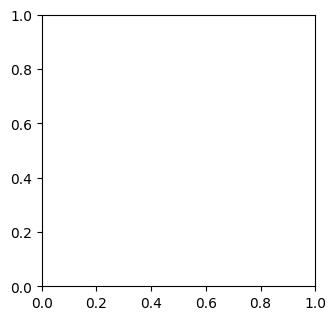

In [34]:
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

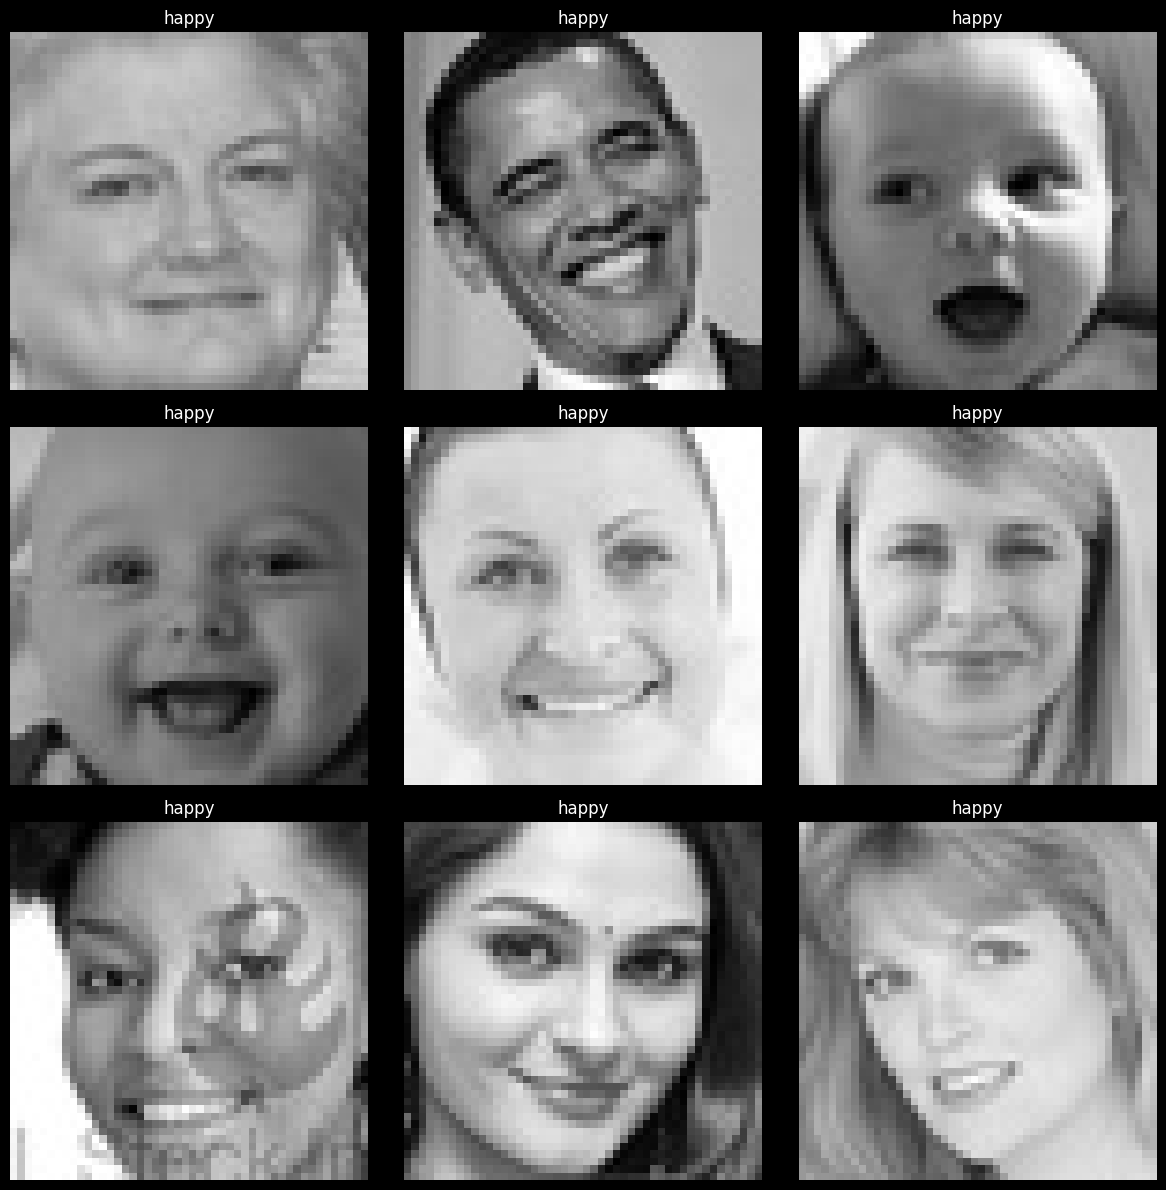

In [54]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

picture_size = 48
expression = 'happy'
folder_path = "images/train/"  

# Construct path to the expression directory
expression_path = os.path.join(folder_path, expression)

# Check if directory exists
if not os.path.exists(expression_path):
    print(f"Error: Path does not exist -> {expression_path}")
else:
    plt.figure(figsize=(12, 12))
    image_files = os.listdir(expression_path)

    # Plot up to 9 images
    for i in range(min(9, len(image_files))):
        plt.subplot(3, 3, i + 1)
        img_path = os.path.join(expression_path, image_files[i])
        img = load_img(img_path, target_size=(picture_size, picture_size))
        plt.imshow(img)
        plt.axis('off')
        plt.title(expression)

    plt.tight_layout()
    plt.show()


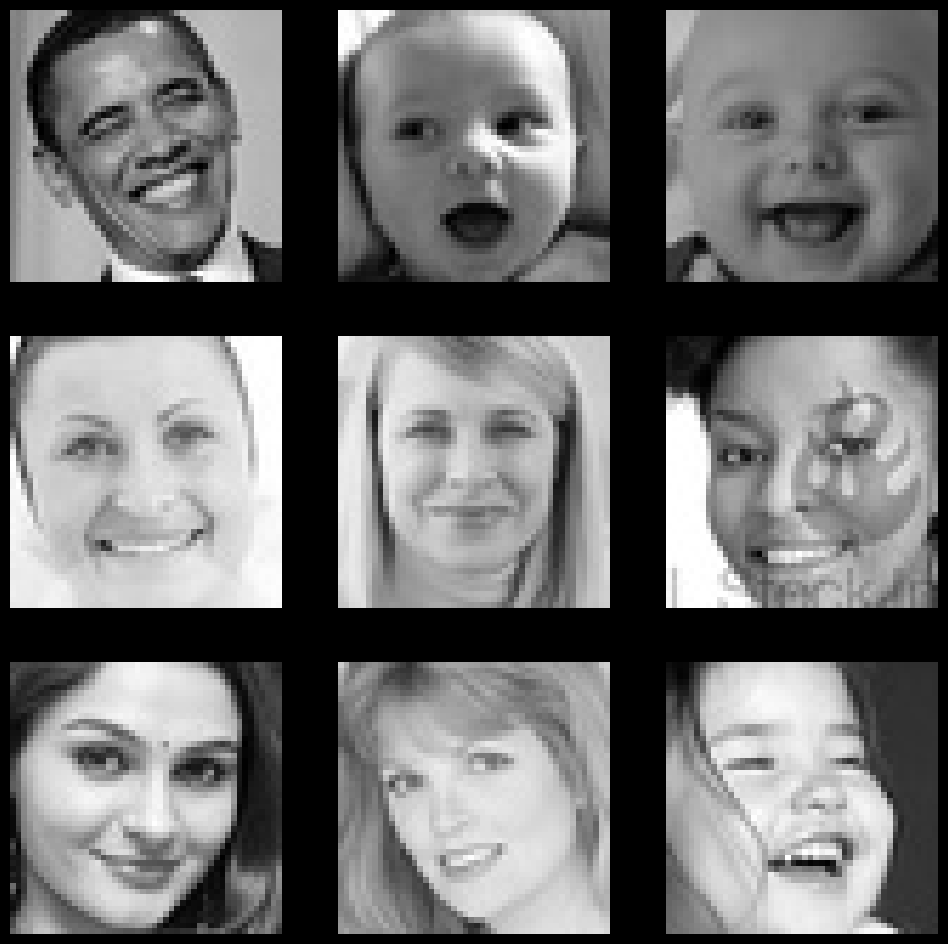

In [55]:
expression = 'happy'

plt.figure(figsize=(12, 12))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + expression + "/" +
                   os.listdir(folder_path + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
    plt.axis('off')
plt.show()


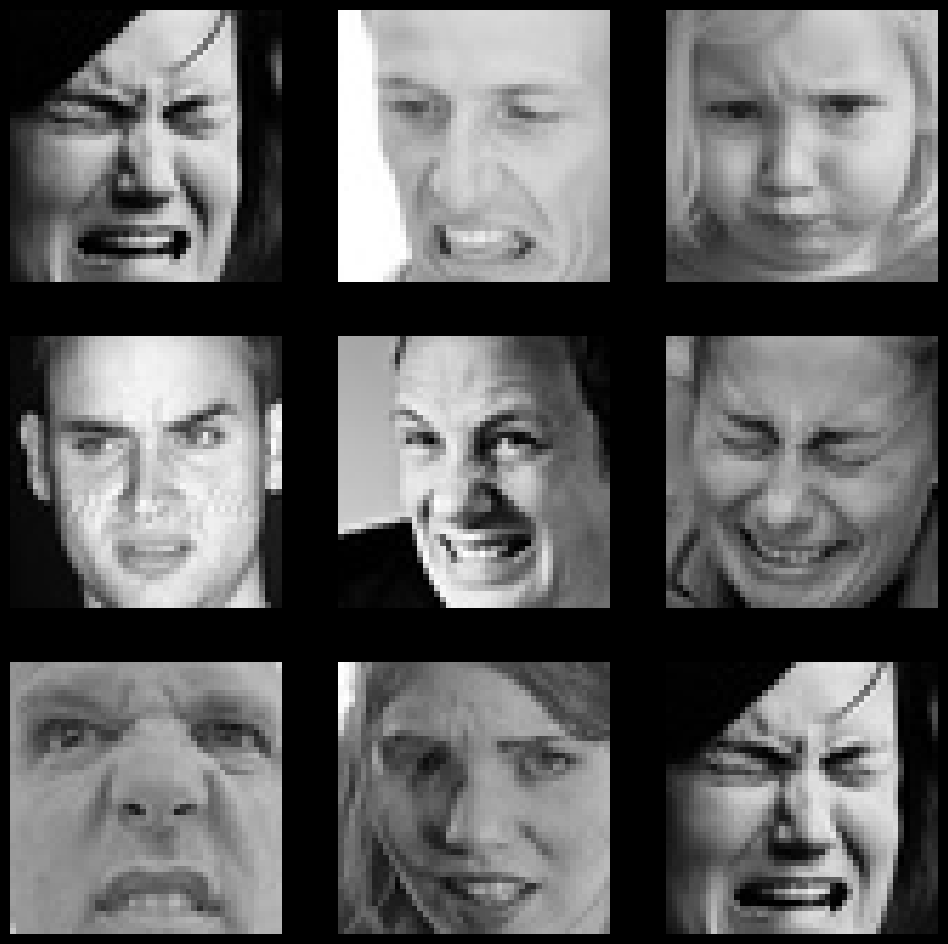

In [56]:
expression = 'disgust'

plt.figure(figsize=(12, 12))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + expression + "/" +
                   os.listdir(folder_path + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
    plt.axis('off')
plt.show()


In [40]:
folder_path = "images/"
picture_size = 48



In [41]:
batch_size = 128
datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(
    folder_path + "train",
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

test_set = datagen_val.flow_from_directory(
    folder_path + "validation",
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

no_of_classes = 7

model = Sequential()

# 1st CNN layer
model.add(Conv2D(64, (3, 3), padding="same", input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd CNN layer
model.add(Conv2D(128, (5, 5), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd CNN layer
model.add(Conv2D(512, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th CNN layer
model.add(Conv2D(512, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten + Fully Connected Layers
model.add(Flatten())

# Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Output layer
model.add(Dense(no_of_classes, activation="softmax"))

# Compile model
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 12, 12, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Callbacks
checkpoint = ModelCheckpoint(
    filepath="./model.h5",
    monitor='val_accuracy',  
    verbose=1,
    save_best_only=True,
    mode='max'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=1,
    restore_best_weights=True
)

reduce_learningrate = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_delta=0.0001
)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

# Set number of epochs
epochs = 48

# Recompile model with correct optimizer syntax
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),  
    metrics=['accuracy']
)


In [45]:
history = model.fit(
    train_set,
    validation_data=test_set,
    epochs=epochs,
    callbacks=callbacks_list
)


C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/48
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.2694 - loss: 1.9268  
Epoch 1: val_accuracy improved from -inf to 0.40051, saving model to ./model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 118s 510ms/step - accuracy: 0.2697 - loss: 1.9261 - val_accuracy: 0.4005 - val_loss: 1.5439 - learning_rate: 0.0010
Epoch 2/48
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 501ms/step - accuracy: 0.4404 - loss: 1.4614  
Epoch 2: val_accuracy improved from 0.40051 to 0.47920, saving model to ./model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 121s 535ms/step - accuracy: 0.4405 - loss: 1.4612 - val_accuracy: 0.4792 - val_loss: 1.3705 - learning_rate: 0.0010
Epoch 3/48
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.5096 - loss: 1.2828  
Epoch 3: val_accuracy improved from 0.47920 to 0.51642, saving model to ./model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 120s 532ms/step - accuracy: 0.5097 - loss: 1.2827 - val_accuracy: 0.5164 - val_loss: 1.2505 - learning_rate: 0.0010
Epoch 4/48
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - accuracy: 0.5492 - loss: 1.1752  
Epoch 4: val_accuracy improved from 0.51642 to 0.55675, saving model to ./model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 120s 532ms/step - accuracy: 0.5492 - loss: 1.1753 - val_accuracy: 0.5568 - val_loss: 1.1830 - learning_rate: 0.0010
Epoch 5/48
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 501ms/step - accuracy: 0.5753 - loss: 1.1196  
Epoch 5: val_accuracy did not improve from 0.55675
226/226 ━━━━━━━━━━━━━━━━━━━━ 121s 534ms/step - accuracy: 0.5753 - loss: 1.1196 - val_accuracy: 0.5408 - val_loss: 1.2254 - learning_rate: 0.0010
Epoch 6/48
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.5991 - loss: 1.0650  
Epoch 6: val_accuracy did not improve from 0.55675
226/226 ━━━━━━━━━━━━━━━━━━━━ 123s 543ms/step - accuracy: 0.5991 - loss: 1.0650 - val_accuracy: 0.5477 - val_loss: 1.2050 - learning_rate: 0.0010
Epoch 7/48
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 569ms/step - accuracy: 0.6183 - loss: 1.0046  
Epoch 7: val_accuracy improved from 0.55675 to 0.59100, saving model to ./model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 138s 609ms/step - accuracy: 0.6183 - loss: 1.0047 - val_accuracy: 0.5910 - val_loss: 1.0962 - learning_rate: 0.0010
Epoch 8/48
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 616ms/step - accuracy: 0.6307 - loss: 0.9745  
Epoch 8: val_accuracy did not improve from 0.59100
226/226 ━━━━━━━━━━━━━━━━━━━━ 148s 655ms/step - accuracy: 0.6307 - loss: 0.9745 - val_accuracy: 0.5566 - val_loss: 1.1712 - learning_rate: 0.0010
Epoch 9/48
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 591ms/step - accuracy: 0.6519 - loss: 0.9236  
Epoch 9: val_accuracy improved from 0.59100 to 0.59737, saving model to ./model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 142s 630ms/step - accuracy: 0.6519 - loss: 0.9236 - val_accuracy: 0.5974 - val_loss: 1.0856 - learning_rate: 0.0010
Epoch 10/48
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 570ms/step - accuracy: 0.6583 - loss: 0.9004  
Epoch 10: val_accuracy did not improve from 0.59737
226/226 ━━━━━━━━━━━━━━━━━━━━ 138s 610ms/step - accuracy: 0.6583 - loss: 0.9004 - val_accuracy: 0.5565 - val_loss: 1.2095 - learning_rate: 0.0010
Epoch 11/48
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 568ms/step - accuracy: 0.6883 - loss: 0.8235  
Epoch 11: val_accuracy did not improve from 0.59737
226/226 ━━━━━━━━━━━━━━━━━━━━ 137s 607ms/step - accuracy: 0.6882 - loss: 0.8236 - val_accuracy: 0.5746 - val_loss: 1.1454 - learning_rate: 0.0010
Epoch 12/48
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 0.7031 - loss: 0.7976  
Epoch 12: val_accuracy improved from 0.59737 to 0.60940, saving model to ./model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 131s 578ms/step - accuracy: 0.7031 - loss: 0.7977 - val_accuracy: 0.6094 - val_loss: 1.0543 - learning_rate: 0.0010
Epoch 13/48
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.7254 - loss: 0.7508  
Epoch 13: val_accuracy did not improve from 0.60940
226/226 ━━━━━━━━━━━━━━━━━━━━ 115s 508ms/step - accuracy: 0.7254 - loss: 0.7509 - val_accuracy: 0.5153 - val_loss: 1.3574 - learning_rate: 0.0010
Epoch 14/48
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 0.7419 - loss: 0.6941  
Epoch 14: val_accuracy improved from 0.60940 to 0.62058, saving model to ./model.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 111s 493ms/step - accuracy: 0.7419 - loss: 0.6943 - val_accuracy: 0.6206 - val_loss: 1.0727 - learning_rate: 0.0010
Epoch 15/48
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - accuracy: 0.7552 - loss: 0.6579  
Epoch 15: val_accuracy did not improve from 0.62058

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
226/226 ━━━━━━━━━━━━━━━━━━━━ 113s 499ms/step - accuracy: 0.7552 - loss: 0.6580 - val_accuracy: 0.5979 - val_loss: 1.1859 - learning_rate: 0.0010
Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 12.


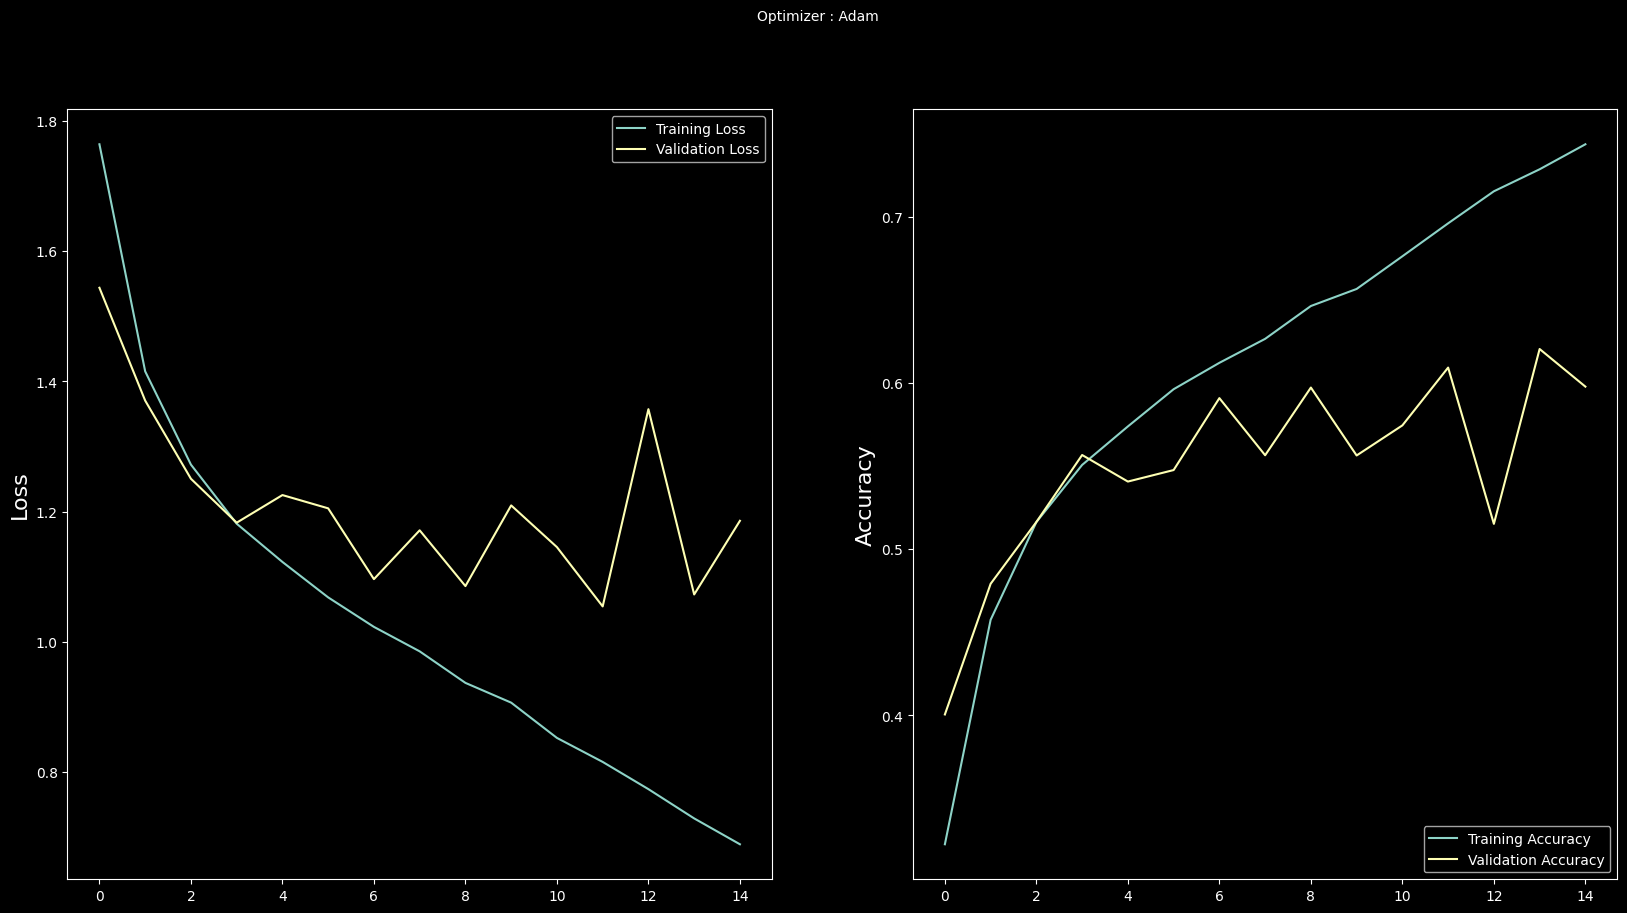

In [49]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()